#Maestría en "Analítica de Datos"
---
Nombre: Oscar Daniel Tunjano Rojas
Código:
Fecha: 2025 Agosto 21
---
Descripción: Este libro trabaja ejercicios básicos de Big Data

# 1. Ejercicio 1: Cargar y conocer  la data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url= "/content/drive/MyDrive/BIG DATA/Historial_de_Multas_reportados_en_el_SIMIT_-_FCM_20250821.csv"
df=pd.read_csv(url)

## 1.1 Conoer la data

In [4]:
# Mostar la tabla sin importar la cantidad de columnas
pd.set_option('display.max_columns', None)
print(df.head(20).to_string(index= False))

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA    DEPARTAMENTO        CIUDAD PAGADO_SI_NO
     2019 MIK715  25/01/2019     414,058       Santander   Bucaramanga           SI
     2020 IBF96B  11/02/2020           0            Meta Villavicencio           SI
     2020 AUW697  08/12/2020     877,803           Cauca    Mercaderes           NO
     2019 FCW577  11/03/2019     414,060       Antioquia      Medellin           SI
     2019 EVL11D  24/08/2019           0       Antioquia     Chigorodo           NO
     2021 FOR75D  09/08/2021     149,185 Valle del Cauca          Cali           SI
     2019 XKX76A  04/10/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 ELA11D  27/03/2019     414,060       Antioquia      Medellin           SI
     2019 TAY686  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 BPI174  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           NO
     2019 FLM417  13/03/2019     414,100     Bogota D.C.   Bogota D.C.      

In [18]:
#Quitar la coma del valor y transformarlo a int
df["VALOR_MULTA"] = df["VALOR_MULTA"].astype(str).str.replace(",","",regex=False)
df["VALOR_MULTA"] = pd.to_numeric(df["VALOR_MULTA"])

In [19]:
#Crear columna convertir pago =1 no pago =0
df["PAGADO_SI_NO_NUM"] = df["PAGADO_SI_NO"].apply(lambda x: 1 if x == "SI" else 0)

In [5]:
#mostrar la metada (como están clasificados los datos)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25234188 entries, 0 to 25234187
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   VIGENCIA      int64 
 1   PLACA         object
 2   FECHA_MULTA   object
 3   VALOR_MULTA   object
 4   DEPARTAMENTO  object
 5   CIUDAD        object
 6   PAGADO_SI_NO  object
dtypes: int64(1), object(6)
memory usage: 1.3+ GB
None


# # 2. Filtrar y selección de datos

In [6]:
#observar los valores unicos pero se evidencian departamentos repetidos pero discriminado por mayuscula y minuscula
valores_unicos = df['DEPARTAMENTO'].unique()

print(valores_unicos)

['Santander' 'Meta' 'Cauca' 'Antioquia' 'Valle del Cauca' 'Bogota D.C.'
 'Huila' 'Boyaca' 'Cundinamarca' 'Magdalena' 'Bolivar' 'Tolima'
 'La Guajira' 'Atlantico' 'Norte de Santander' 'Narino' 'Sucre' 'Caldas'
 'Cesar' 'Caqueta' 'Risaralda' 'Casanare' 'Quindio' 'Arauca'
 'San Andres y Providencia' 'Cordoba' 'Putumayo' 'Guaviare' 'Choco'
 'Guainia' 'Amazonas' 'SANTANDER' 'CUNDINAMARCA' 'ANTIOQUIA' 'RISARALDA'
 'VALLE DEL CAUCA' 'CESAR' 'NORTE DE SANTANDER' 'META' 'BOYACA' 'CALDAS'
 'TOLIMA' 'BOGOTA D.C.' 'CASANARE' 'ATLANTICO' 'HUILA' 'BOLIVAR' 'NARINO'
 'MAGDALENA' 'SUCRE' 'CAUCA' 'SAN ANDRES Y PROVIDENCIA' 'LA GUAJIRA'
 'PUTUMAYO' 'QUINDIO' 'CAQUETA' 'ARAUCA' 'CORDOBA' 'GUAINIA' 'CHOCO'
 'GUAVIARE' 'AMAZONAS']


In [7]:
#unir y dejar en mayuscula
df['DEPARTAMENTO']= df['DEPARTAMENTO'].str.strip().str.upper()
print(df['DEPARTAMENTO'].unique())

['SANTANDER' 'META' 'CAUCA' 'ANTIOQUIA' 'VALLE DEL CAUCA' 'BOGOTA D.C.'
 'HUILA' 'BOYACA' 'CUNDINAMARCA' 'MAGDALENA' 'BOLIVAR' 'TOLIMA'
 'LA GUAJIRA' 'ATLANTICO' 'NORTE DE SANTANDER' 'NARINO' 'SUCRE' 'CALDAS'
 'CESAR' 'CAQUETA' 'RISARALDA' 'CASANARE' 'QUINDIO' 'ARAUCA'
 'SAN ANDRES Y PROVIDENCIA' 'CORDOBA' 'PUTUMAYO' 'GUAVIARE' 'CHOCO'
 'GUAINIA' 'AMAZONAS']


In [8]:
# Seleccionar Bogotá ()
df_bogota = df[df['DEPARTAMENTO'] == 'BOGOTA D.C.']
print(df_bogota.head(20).to_string(index= False))
print(f"La cantidad de registros de Bogota D.C. es {df_bogota.shape[0]}" )

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA DEPARTAMENTO      CIUDAD PAGADO_SI_NO
     2019 XKX76A  04/10/2019     414,100  BOGOTA D.C. Bogota D.C.           SI
     2019 TAY686  13/03/2019     414,100  BOGOTA D.C. Bogota D.C.           SI
     2019 BPI174  13/03/2019     414,100  BOGOTA D.C. Bogota D.C.           NO
     2019 FLM417  13/03/2019     414,100  BOGOTA D.C. Bogota D.C.           SI
     2019 JFK618  13/03/2019     414,100  BOGOTA D.C. Bogota D.C.           SI
     2019 VDM981  13/03/2019     414,100  BOGOTA D.C. Bogota D.C.           SI
     2020 IKX489  22/09/2020     234,100  BOGOTA D.C. Bogota D.C.           NO
     2021 EQZ167  01/03/2021     447,700  BOGOTA D.C. Bogota D.C.           SI
     2021 IAU451  01/03/2021     447,700  BOGOTA D.C. Bogota D.C.           SI
     2021 FNO652  15/10/2021     447,700  BOGOTA D.C. Bogota D.C.           SI
     2019 AIQ94F  06/05/2019     414,100  BOGOTA D.C. Bogota D.C.           SI
     2020 CDP093  15/01/2020     438,900  BOGOTA D.C

## 2.1 Conocer  la data

In [ ]:
#obtener los datos unicos
print(df_bogota["VIGENCIA"].unique())

[2019 2020 2021 2023 2022 2024]


In [15]:
#verificar los datos nulos
print(df_bogota.isnull().sum())
#Eliminar filas con valores nulos
#df_bogota.dropna(inplace=True)

VIGENCIA          0
PLACA           203
FECHA_MULTA       0
VALOR_MULTA       0
DEPARTAMENTO      0
CIUDAD            0
PAGADO_SI_NO      0
dtype: int64


# # 3. ETL
---
Limpieza y transformación de los datos
1. Borrado de registro con datos nulos
2. Crear  columnas
3. Transformarcolumnas en  datos reconocidos (texto, fechas, listas)

In [ ]:
#Quitar la coma del valor y transformarlo a int
df_bogota["VALOR_MULTA"] = df_bogota["VALOR_MULTA"].astype(str).str.replace(",","",regex=False)
df_bogota["VALOR_MULTA"] = pd.to_numeric(df_bogota["VALOR_MULTA"])


/tmp/ipython-input-3974633753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota["VALOR_MULTA"] = df_bogota["VALOR_MULTA"].astype(str).str.replace(",","",regex=False)
/tmp/ipython-input-3974633753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota["VALOR_MULTA"] = pd.to_numeric(df_bogota["VALOR_MULTA"])


In [ ]:
print(df_bogota.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4844219 entries, 6 to 25234187
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   VIGENCIA      int64 
 1   PLACA         object
 2   FECHA_MULTA   object
 3   VALOR_MULTA   int64 
 4   DEPARTAMENTO  object
 5   CIUDAD        object
 6   PAGADO_SI_NO  object
dtypes: int64(2), object(5)
memory usage: 295.7+ MB
None


In [ ]:
#Crear columna convertir pago =1 no pago =0
df_bogota["PAGADO_SI_NO_NUM"] = df_bogota["PAGADO_SI_NO"].apply(lambda x: 1 if x == "SI" else 0)

/tmp/ipython-input-3059946852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bogota["PAGADO_SI_NO_NUM"] = df_bogota["PAGADO_SI_NO"].apply(lambda x: 1 if x == "SI" else 0)


# # 4. Agregación
---
- (filtros / acumulados)  Estadisiticas descriptivas
- funciones básicas de panda

In [ ]:
#descriptiva valor multa
with pd.option_context("display.float_format","{:f}".format):
  print(df_bogota["VALOR_MULTA"].describe())

#promedio por vigenciaaño
multas_promedio_por_año = df_bogota.groupby("VIGENCIA")["VALOR_MULTA"].mean()
print(multas_promedio_por_año)

count    4844219.000000
mean      525463.875088
std       227787.796071
min            0.000000
25%       438900.000000
50%       468500.000000
75%       572600.000000
max     54970700.000000
Name: VALOR_MULTA, dtype: float64
VIGENCIA
2019    422810.607262
2020    452831.633270
2021    474441.471548
2022    512833.481526
2023    570499.032588
2024    614850.227137
Name: VALOR_MULTA, dtype: float64


# # 5. Análisis avanzado

In [ ]:
# Tabla para see the percentage of multas pagadas por vigencia
multas_counts = df_bogota.groupby(["VIGENCIA", "PAGADO_SI_NO_NUM"]).size().unstack(fill_value=0)
multas_counts["TOTAL"]= multas_counts.sum(axis =1)
multas_porcentaje = multas_counts.div(multas_counts["TOTAL"], axis=0) * 100
print("porcentajes demultas pagadas por año")
print(multas_porcentaje)

porcentajes demultas pagadas por año
PAGADO_SI_NO_NUM          0          1  TOTAL
VIGENCIA                                     
2019              18.756310  81.243690  100.0
2020              36.388183  63.611817  100.0
2021              46.878995  53.121005  100.0
2022              52.303577  47.696423  100.0
2023              53.837937  46.162063  100.0
2024              44.989155  55.010845  100.0


# 6. Visualización de datos
---
matplotlib y seaborn

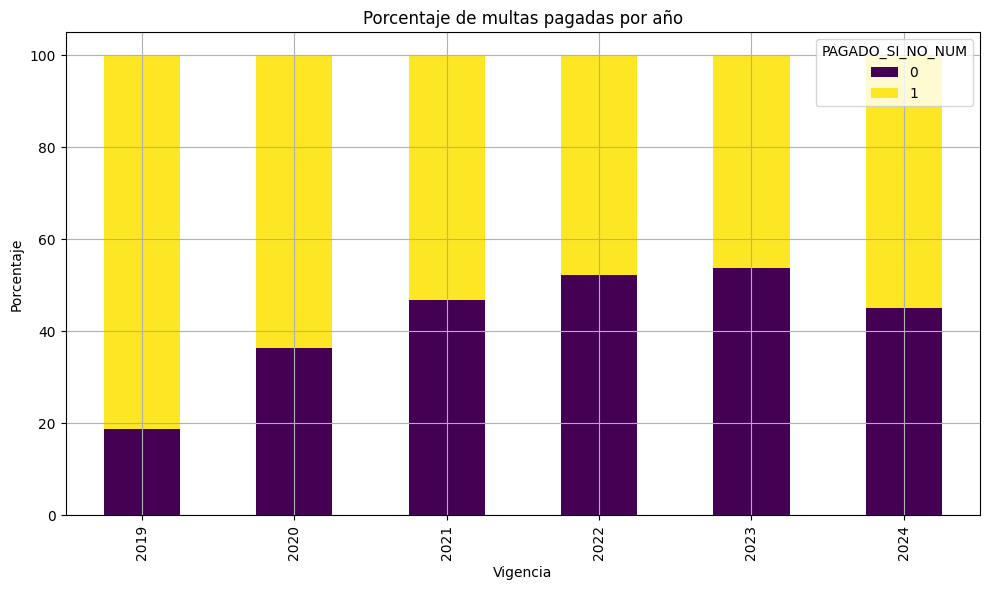

In [ ]:
multas_porcentaje[[0, 1]].plot(kind = 'bar', stacked =True, figsize=(10,6),colormap='viridis')
plt.title('Porcentaje de multas pagadas por año')
plt.xlabel('Vigencia')
plt.ylabel('Porcentaje')
plt.grid(True)
plt.tight_layout()
plt.show()

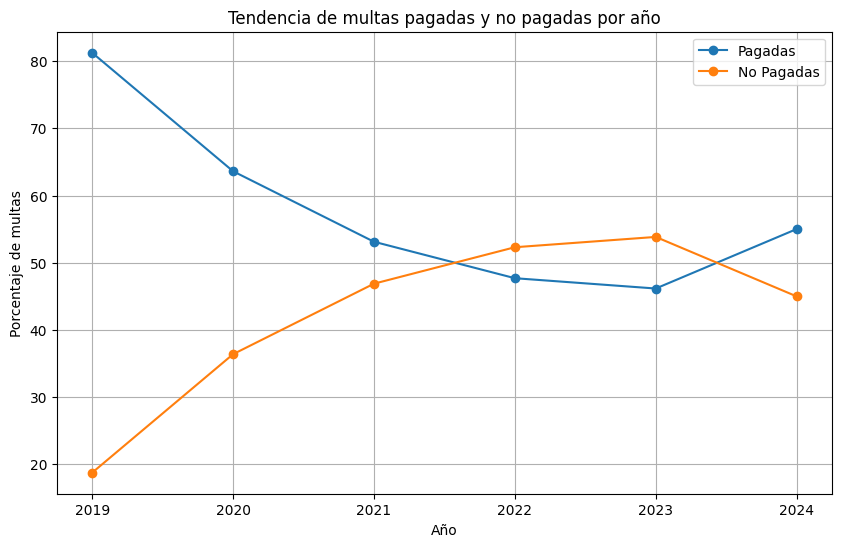

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(multas_porcentaje.index, multas_porcentaje[1], marker='o', linestyle='-', label='Pagadas')
plt.plot(multas_porcentaje.index, multas_porcentaje[0], marker='o', linestyle='-', label='No Pagadas')
plt.title('Tendencia de multas pagadas y no pagadas por año')
plt.xlabel('Año')
plt.ylabel('Porcentaje de multas')
plt.grid(True)
plt.legend()
plt.show()

# Analisis para Cundinamarca y Bolivar

In [20]:
# Seleccionar Bogotá ()
df_cun = df[df['DEPARTAMENTO'] == 'CUNDINAMARCA']
print(df_cun.head().to_string(index= False))
print(f"La cantidad de registros de Cundinamarca son {df_cun.shape[0]}" )

df_bolivar = df[df['DEPARTAMENTO'] == 'BOLIVAR']
print(df_bolivar.head().to_string(index= False))
print(f"La cantidad de registros de Bolivar son {df_bolivar.shape[0]}" )


 VIGENCIA  PLACA FECHA_MULTA  VALOR_MULTA DEPARTAMENTO    CIUDAD PAGADO_SI_NO  PAGADO_SI_NO_NUM
     2020 CZM31E  04/02/2020       877803 CUNDINAMARCA   Villeta           SI                 1
     2019 RMW829  26/09/2019       414058 CUNDINAMARCA Zipaquira           SI                 1
     2020 VHW01C  11/02/2020       438902 CUNDINAMARCA   Caqueza           NO                 0
     2021  JOL63  13/01/2021       447548 CUNDINAMARCA Zipaquira           SI                 1
     2021 SBX01B  22/06/2021       895096 CUNDINAMARCA La Calera           SI                 1
La cantidad de registros de Cundinamarca son 1201282
 VIGENCIA  PLACA FECHA_MULTA  VALOR_MULTA DEPARTAMENTO         CIUDAD PAGADO_SI_NO  PAGADO_SI_NO_NUM
     2021 BPV285  31/05/2021       447600      BOLIVAR      Cartagena           NO                 0
     2021 NDC11F  17/04/2021       447555      BOLIVAR        Turbaco           SI                 1
     2021 NCO19F  18/04/2021       447555      BOLIVAR        Turbac

In [17]:
#obtener los datos unicos
print(df_cun["VIGENCIA"].unique())

print(df_bolivar["VIGENCIA"].unique())

[2020 2019 2021 2022 2023 2024]
[2021 2019 2020 2022 2023 2024]


In [21]:
#descriptiva valor multa
with pd.option_context("display.float_format","{:f}".format):
  print(df_cun["VALOR_MULTA"].describe())

#promedio por vigenciaaño
multas_promedio_por_año = df_cun.groupby("VIGENCIA")["VALOR_MULTA"].mean()
print(multas_promedio_por_año)

count     1201282.000000
mean       636058.035907
std       1454010.456440
min             0.000000
25%        438901.000000
50%        522789.000000
75%        572518.000000
max     109923840.000000
Name: VALOR_MULTA, dtype: float64
VIGENCIA
2019    582571.276535
2020    546492.412899
2021    602657.573799
2022    627629.162002
2023    691709.946999
2024    736568.107372
Name: VALOR_MULTA, dtype: float64


In [22]:
#descriptiva valor multa
with pd.option_context("display.float_format","{:f}".format):
  print(df_bolivar["VALOR_MULTA"].describe())

#promedio por vigenciaaño
multas_promedio_por_año = df_bolivar.groupby("VIGENCIA")["VALOR_MULTA"].mean()
print(multas_promedio_por_año)

count     519129.000000
mean      628311.944449
std      1383591.140970
min            0.000000
25%       438900.000000
50%       468450.000000
75%       572520.000000
max     54961920.000000
Name: VALOR_MULTA, dtype: float64
VIGENCIA
2019    537231.209600
2020    554005.751972
2021    600995.580967
2022    639153.067888
2023    695314.286171
2024    784934.794921
Name: VALOR_MULTA, dtype: float64


In [26]:
# Tabla para see the percentage of multas pagadas por vigencia
multas_counts_cun = df_cun.groupby(["VIGENCIA", "PAGADO_SI_NO_NUM"]).size().unstack(fill_value=0)
multas_counts_cun["TOTAL"]= multas_counts_cun.sum(axis =1)
multas_porcentaje_cun = multas_counts_cun.div(multas_counts["TOTAL"], axis=0) * 100
print("porcentajes demultas pagadas por año")
print(multas_porcentaje_cun)

porcentajes demultas pagadas por año
PAGADO_SI_NO_NUM          0          1  TOTAL
VIGENCIA                                     
2019              15.268004  84.731996  100.0
2020              17.074033  82.925967  100.0
2021              18.600462  81.399538  100.0
2022              25.219416  74.780584  100.0
2023              34.500625  65.499375  100.0
2024              38.626204  61.373796  100.0


In [27]:
# Tabla para see the percentage of multas pagadas por vigencia
multas_counts_bolivar = df_bolivar.groupby(["VIGENCIA", "PAGADO_SI_NO_NUM"]).size().unstack(fill_value=0)
multas_counts_bolivar["TOTAL"]= multas_counts_bolivar.sum(axis =1)
multas_porcentaje_bolivar = multas_counts_bolivar.div(multas_counts["TOTAL"], axis=0) * 100
print("porcentajes demultas pagadas por año")
print(multas_porcentaje_bolivar)

porcentajes demultas pagadas por año
PAGADO_SI_NO_NUM          0          1      TOTAL
VIGENCIA                                         
2019              28.213915  22.690408  50.904323
2020              22.985068  14.824599  37.809667
2021              37.908199  22.536952  60.445150
2022              33.498075  19.473724  52.971799
2023              27.148186  12.084790  39.232976
2024              19.461147   7.158023  26.619170


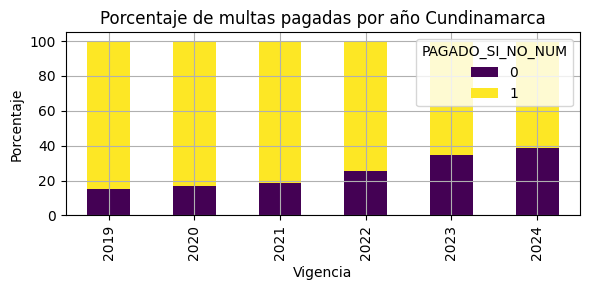

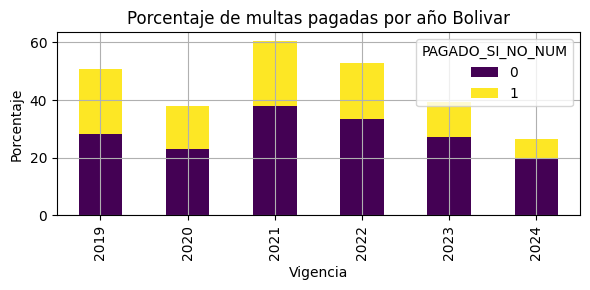

In [33]:
multas_porcentaje_cun[[0, 1]].plot(kind = 'bar', stacked =True, figsize=(6,3),colormap='viridis')
plt.title('Porcentaje de multas pagadas por año Cundinamarca')
plt.xlabel('Vigencia')
plt.ylabel('Porcentaje')
plt.grid(True)
plt.tight_layout()
plt.show()

multas_porcentaje_bolivar[[0, 1]].plot(kind = 'bar', stacked =True, figsize=(6,3),colormap='viridis')
plt.title('Porcentaje de multas pagadas por año Bolivar')
plt.xlabel('Vigencia')
plt.ylabel('Porcentaje')
plt.grid(True)
plt.tight_layout()
plt.show()

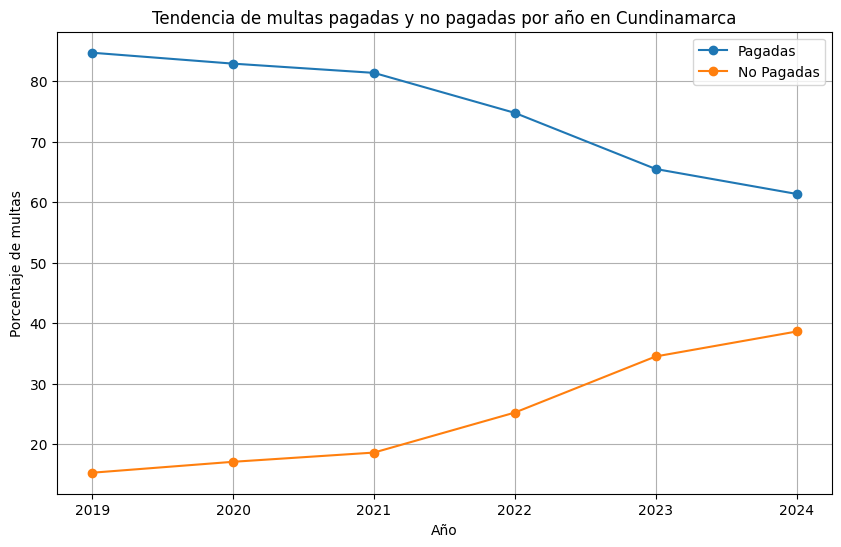

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(multas_porcentaje_cun.index, multas_porcentaje_cun[1], marker='o', linestyle='-', label='Pagadas')
plt.plot(multas_porcentaje_cun.index, multas_porcentaje_cun[0], marker='o', linestyle='-', label='No Pagadas')
plt.title('Tendencia de multas pagadas y no pagadas por año en Cundinamarca')
plt.xlabel('Año')
plt.ylabel('Porcentaje de multas')
plt.grid(True)
plt.legend()
plt.show()

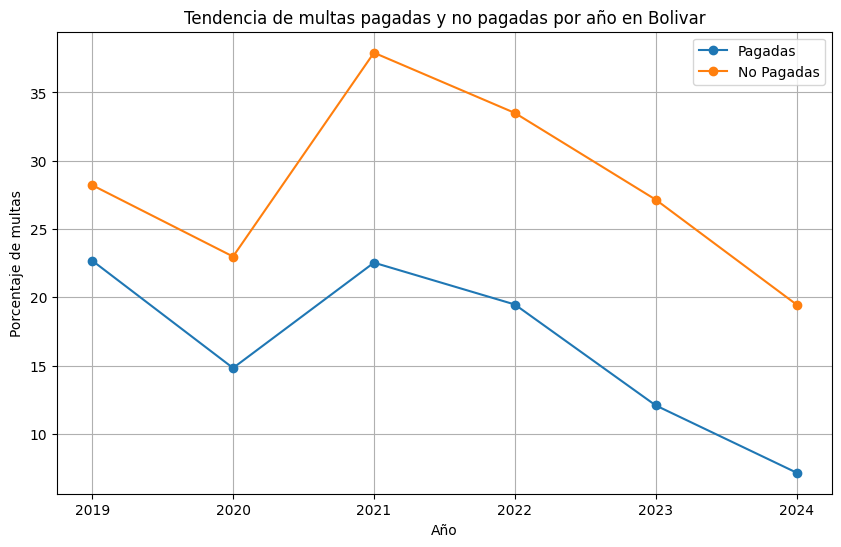

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(multas_porcentaje_bolivar.index, multas_porcentaje_bolivar[1], marker='o', linestyle='-', label='Pagadas')
plt.plot(multas_porcentaje_bolivar.index, multas_porcentaje_bolivar[0], marker='o', linestyle='-', label='No Pagadas')
plt.title('Tendencia de multas pagadas y no pagadas por año en Bolivar')
plt.xlabel('Año')
plt.ylabel('Porcentaje de multas')
plt.grid(True)
plt.legend()
plt.show()